## Project Brief

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.



## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

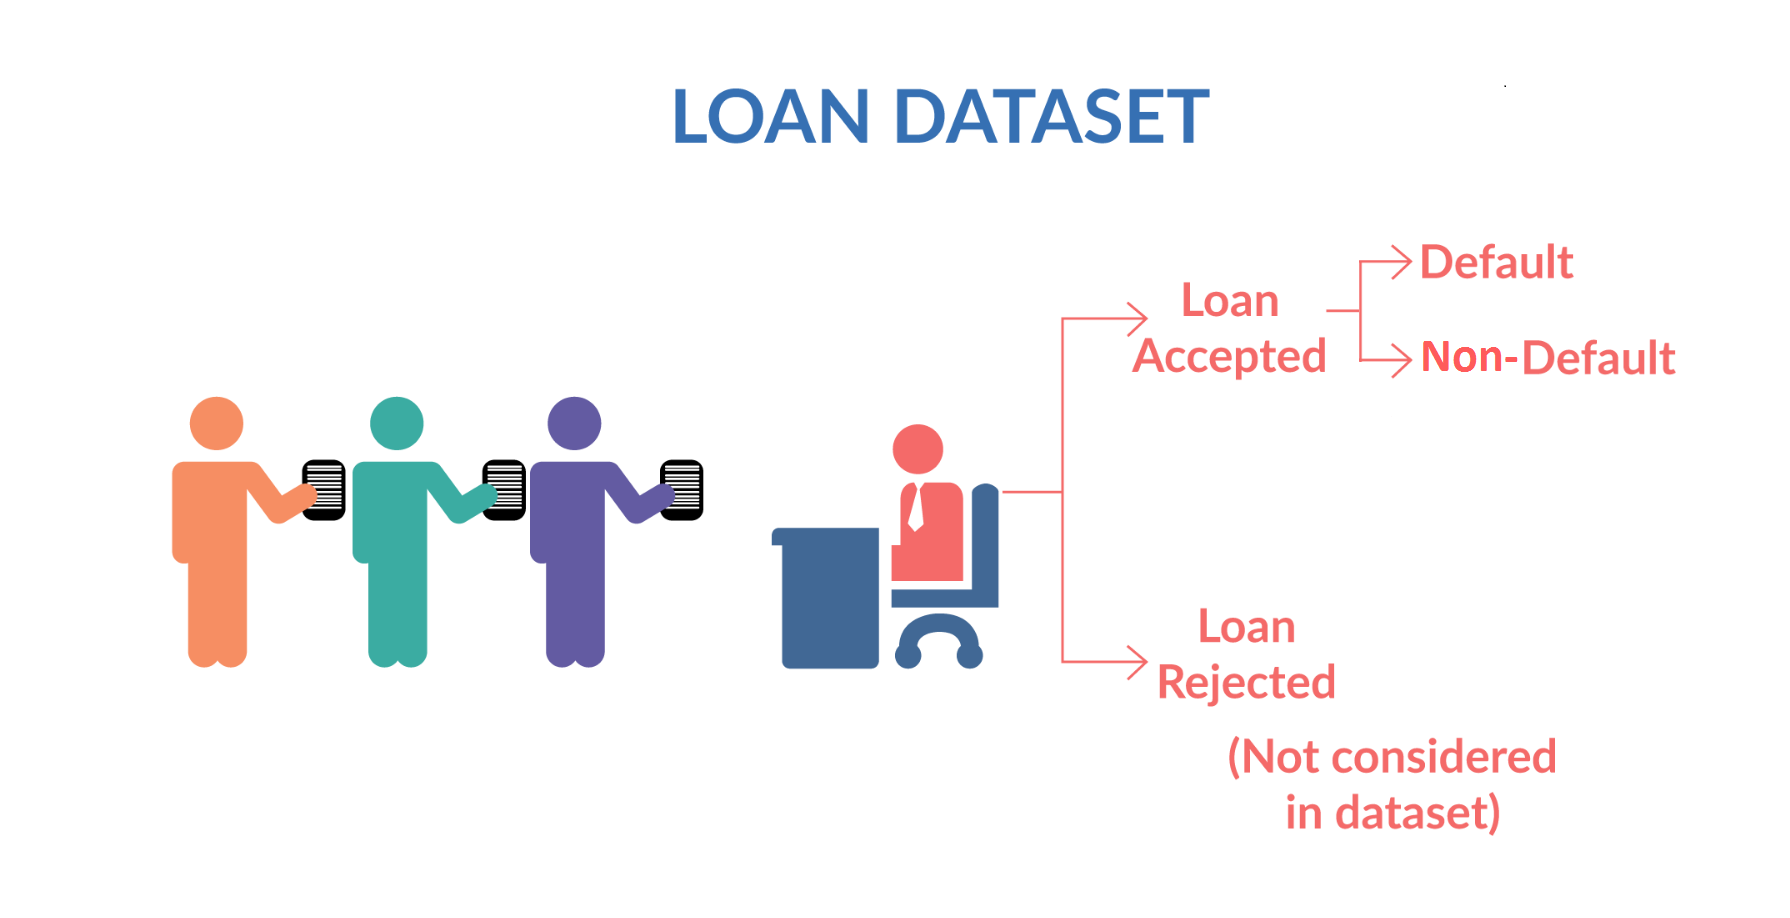

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
Loan rejected:The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.



### Importing packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:

pd.set_option('display.max_rows', 100, 'display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:

loanData = pd.read_csv('C:/Users/DK/Desktop/upgrad/learning/MainCourse/lendingclub/loan.csv',encoding = "ISO-8859-1")
loanData.head()

C:\Users\DK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.

### Data understanding

In [5]:
loanData.shape

(39717, 111)

In [6]:
loanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

In [7]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Missing values per column expressed as % of total number of values

In [8]:
missing = round(100*(loanData.isnull().sum()/len(loanData.index)), 2)
missing

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

### Data Cleaning

56 Columns has more than 90% of data as missing so we can drop them 

In [9]:
missing.loc[missing > 50].count()

57

In [10]:
missing.loc[missing > 75].count()

56

In [11]:
missing.loc[missing > 90].count()

56

In [12]:
Column_with_missing_value = list(missing.loc[missing > 90].index)
len(Column_with_missing_value)

56

Dropping those columns which has more than 90% of missing value

In [13]:
loanData = loanData.drop(Column_with_missing_value, axis=1)
loanData.shape

(39717, 55)

Checking that one cloumn which has more then 50% of missing data 

In [14]:
missing = round(100*(loanData.isnull().sum()/len(loanData.index)), 2)
Column_with_missing_value = list(missing.loc[missing > 50].index)
Column_with_missing_value

['mths_since_last_delinq']

We will keep this column as of now and move further

In [15]:
loanData.loc[:, loanData.dtypes == np.object].columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

Url and Desc column we can drop them as they dont play much role 

In [16]:
loanData = loanData.drop(['url','desc'], axis =1 )

In [17]:
loanData.shape

(39717, 53)

Count of no of unique values in the column



In [18]:
uniqueDataCount = []
for row in loanData.columns.tolist():
    uniqueDataCount.append({'column': row, 'count': len(loanData[row].unique())})
uniqueData = pd.DataFrame(uniqueDataCount).sort_values('count')
uniqueData

,column,count
50,delinq_amnt,1
48,acc_now_delinq,1
47,application_type,1
46,policy_code,1
32,initial_list_status,1
17,pymnt_plan,1
52,tax_liens,2
49,chargeoff_within_12_mths,2
5,term,2
45,collections_12_mths_ex_med,2


In [19]:
loanData['delinq_amnt'].unique()

array([0], dtype=int64)

In [20]:
loanData['acc_now_delinq'].unique()

array([0], dtype=int64)

In [21]:
loanData['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [22]:
loanData['policy_code'].unique()

array([1], dtype=int64)

In [23]:
loanData['initial_list_status'].unique()

array(['f'], dtype=object)

In [24]:
loanData['pymnt_plan'].unique()

array(['n'], dtype=object)

dropping these columns as they have unique values everywhere and does not support our analysis

In [25]:
columnsList=['delinq_amnt', 'acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status', 'pymnt_plan']
loanData = loanData.drop(columnsList, axis =1 )
loanData.shape

(39717, 47)

In [26]:
loanData['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [27]:
loanData['collections_12_mths_ex_med'].unique()

array([ 0., nan])

dropping these two columns as their value is either zero , or null .So it will not add any importance to the data

In [28]:
loanData = loanData.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med'], axis =1 )
loanData.shape

(39717, 45)

Checking total number of missing values in the filtered columns

In [29]:
missing = round(100*(loanData.isnull().sum()/len(loanData.index)), 2)
missing

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

Since most of the comuns in the data looks good , except mths_since_last_delinq , adding this column will spoil the overall analysis so we can drop it now 

In [30]:
loanData = loanData.drop(['mths_since_last_delinq'], axis =1 )
loanData.shape

(39717, 44)

From the information Given :

id: A unique LC assigned ID for the loan listing.

member_id : A unique LC assigned Id for the borrower member.

So we can drop these two columns as well

In [31]:
loanData = loanData.drop(['id','member_id'], axis =1 )
loanData.shape

(39717, 42)

### Validate the data type

In [32]:
loanData.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,0.00
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,0.00
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,0.00
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,0.00
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,0.00


In [33]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

term has a value month at end 

int_rate has % symbol at end 

zip_code has xx at the end 

Correcting the unwanted value in these fields

In [34]:
loanData['term_months'] = loanData['term'].str.rstrip('months')
del loanData['term']
loanData['int_rate_percentage'] = loanData['int_rate'].str.rstrip('%')
del loanData['int_rate']
loanData['zip_code'] = loanData['zip_code'].str.rstrip('xx')
loanData['revol_util_percentage'] = loanData['revol_util'].str.rstrip('%')
del loanData['revol_util']


In [35]:
loanData['term_months'].astype('int32')
loanData['int_rate_percentage'].astype('float64')
loanData['revol_util_percentage'].astype('float64')
loanData['zip_code'].astype('int32')
loanData.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percentage,revol_util_percentage
0,5000,5000,"4,975.00",162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,860,AZ,27.65,0,Jan-85,1,3,0,13648,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,0.00,36,10.65,83.70
1,2500,2500,"2,500.00",59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,0.00,60,15.27,9.40
2,2400,2400,"2,400.00",84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,606,IL,8.72,0,Nov-01,2,2,0,2956,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,0.00,36,15.96,98.50
3,10000,10000,"10,000.00",339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,0.00,36,13.49,21
4,3000,3000,"3,000.00",67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,0.00,60,12.69,53.90


In [36]:
loanData['emp_experience'] = loanData['emp_length'].str.rstrip('years ')
loanData['emp_experience'].replace({'10+': '10'}, inplace=True)
loanData['emp_experience'][loanData['emp_experience'] == '< 1'] = '0.5'
del loanData['emp_length']


C:\Users\DK\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Univariate Analysis

In [37]:
masterData = loanData[:]
masterData["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

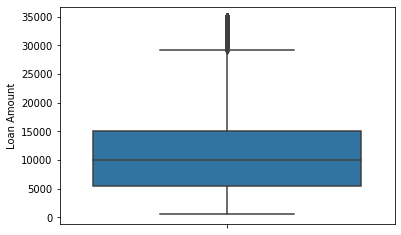

In [38]:
sns.boxplot( y=masterData["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()


Inference: The loan amount varies from 0 to 35,000 having mean of 10,000

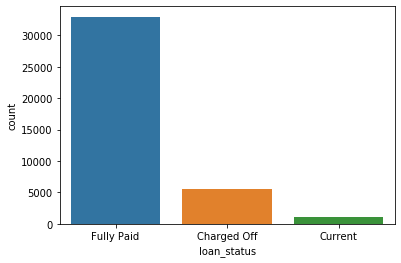

In [39]:
sns.countplot(x= masterData["loan_status"])
plt.show()

Inference: Could see most of them have payed the loan , 14.5% of total population has been charged off and 3% are in current process

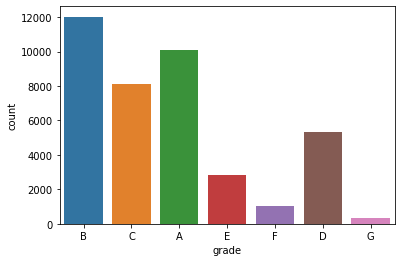

In [40]:
sns.countplot(x='grade', data=masterData)
plt.show()


Inference : Most of the loan grades are of Type A,B,C

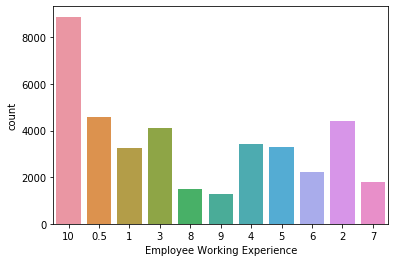

In [41]:
sns.countplot(x='emp_experience', data=masterData)
plt.xlabel('Employee Working Experience')
plt.show()


Inference: Majority of employees applying for the loan have more than 10 years of experience

C:\Users\DK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


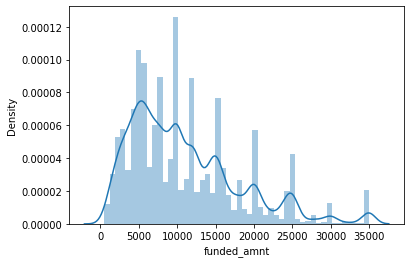

In [42]:
sns.distplot(masterData['funded_amnt'])
plt.show()

Inference:  Most of the loan amount given is between 5 to 10 lakhs


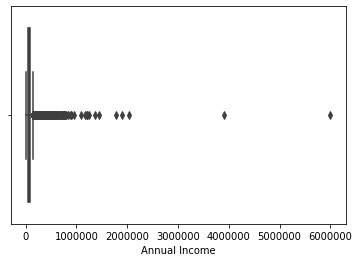

In [43]:
sns.boxplot(x=masterData['annual_inc'])
plt.xlabel('Annual Income')
plt.show()


Inference: There are only two applicants having annual income of more than 30 lakhs

C:\Users\DK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


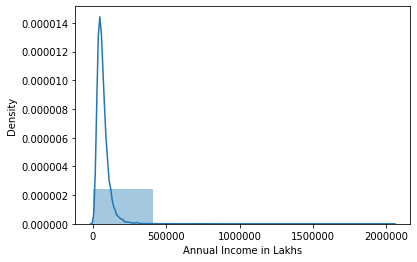

In [44]:
sns.distplot(masterData[masterData['annual_inc'] < 3000000]['annual_inc'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()


Inference: Majority of loan applicants have income less than 5 lakhs

## Segmented Univariate Analysis

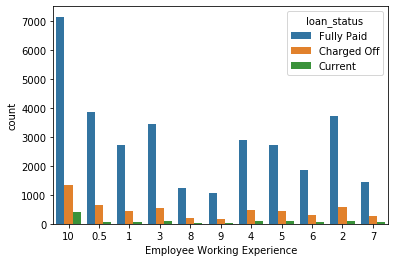

In [45]:
sns.countplot(x='emp_experience', hue='loan_status', data=masterData)
plt.xlabel('Employee Working Experience')
plt.show()


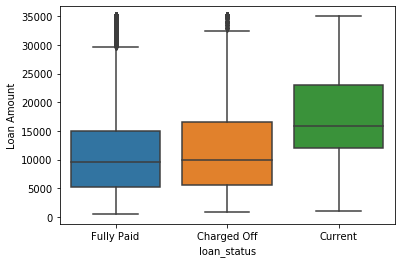

In [46]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=masterData)
plt.ylabel('Loan Amount')
plt.show()

**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

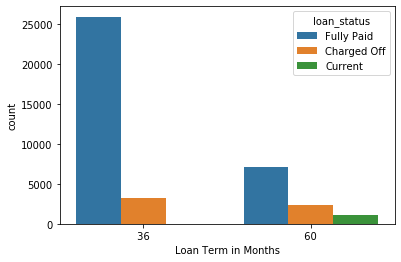

In [47]:
sns.countplot( x="term_months", hue='loan_status', data=masterData)
plt.xlabel('Loan Term in Months')
plt.show()

**Inference:** Tenure of 36 months have have high chances to be defaulters

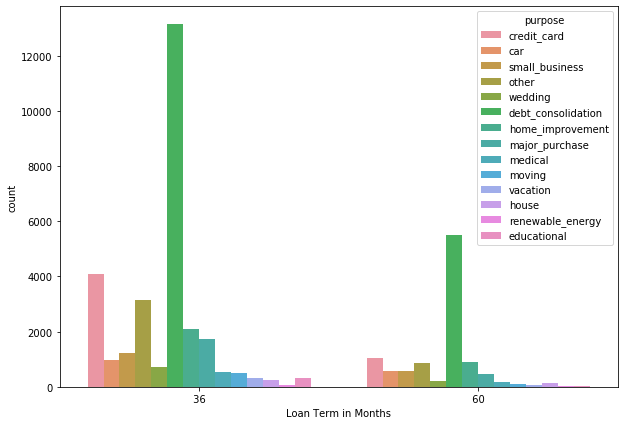

In [48]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=masterData)
plt.xlabel('Loan Term in Months')
plt.show()

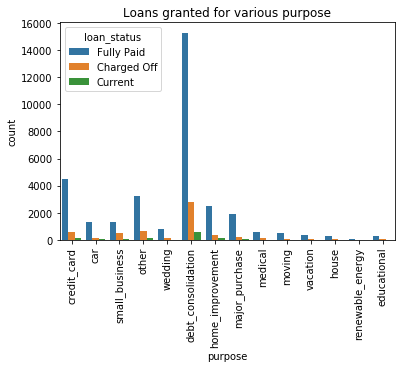

In [49]:
sns.countplot(x='purpose', hue='loan_status', data=masterData)
plt.title('Loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

**Inference:** debt_consolidation is the place where more loan is active , and ore are in charged off

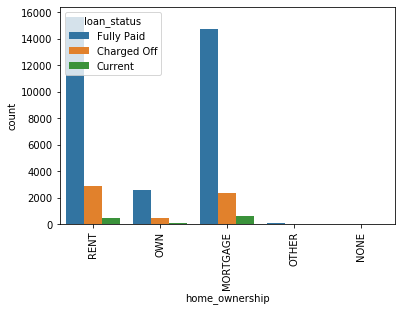

In [50]:
sns.countplot(x='home_ownership',hue='loan_status', data=masterData)
plt.xticks(rotation=90)
plt.show()

**Inference:** Rented house people are getting charged off more

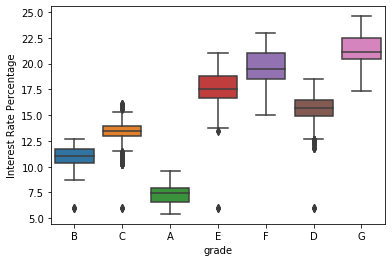

In [51]:
masterData['int_rate_percentage'] = masterData['int_rate_percentage'].astype('float32')
sns.boxplot(y='int_rate_percentage', x='grade', data=masterData)
plt.ylabel('Interest Rate Percentage')
plt.show()

**Inference:** Intrest rate percentage increases with the grade

### Bivariate Plots

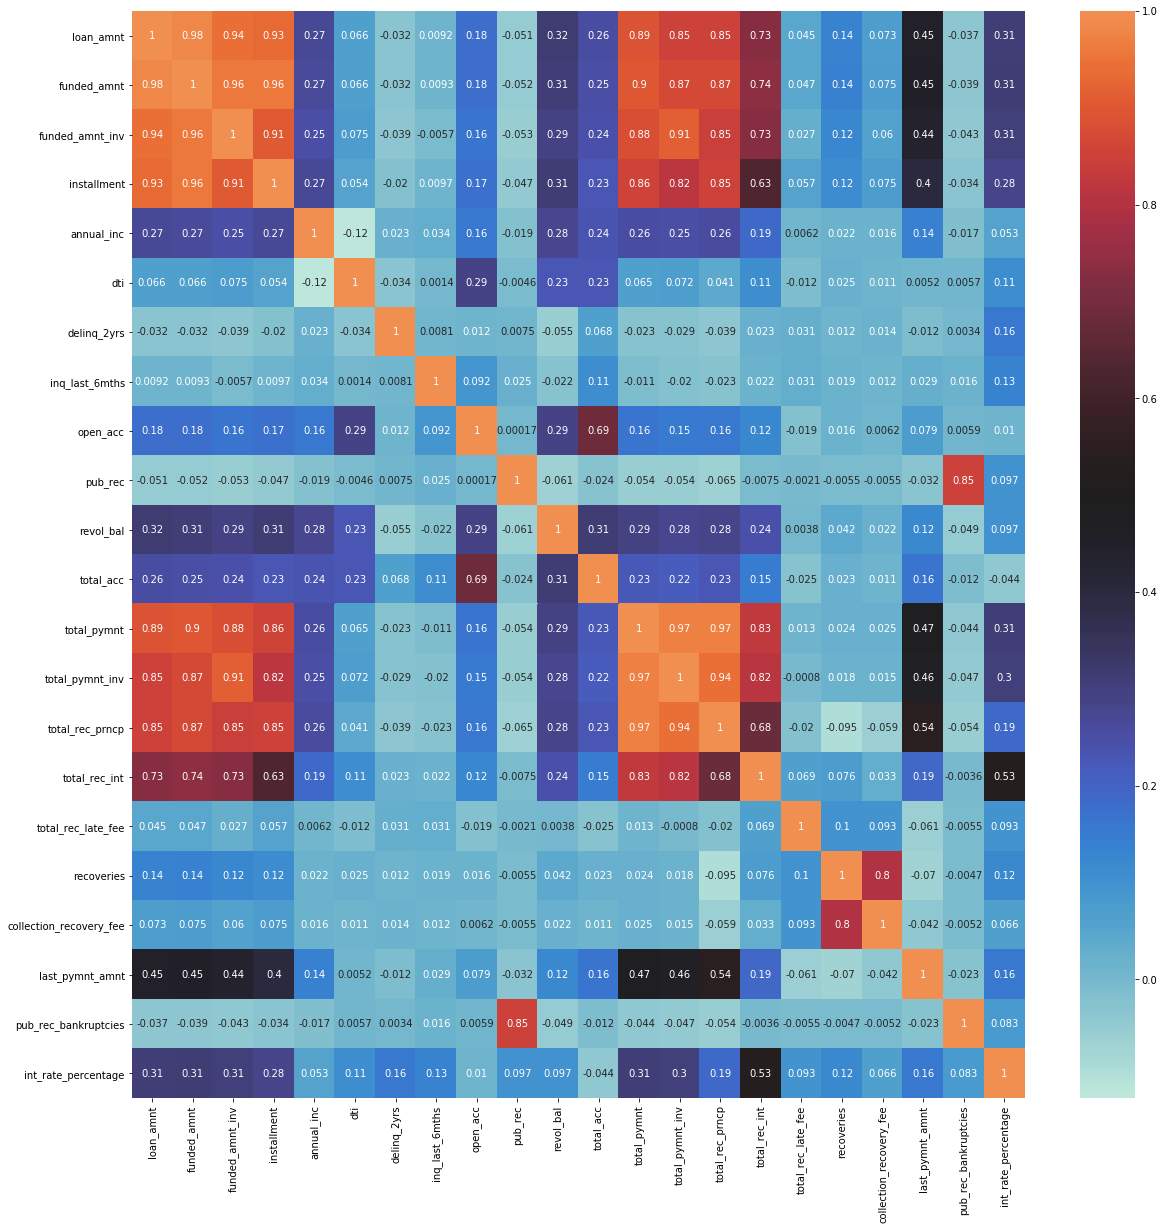

In [52]:
del masterData['out_prncp']
del masterData['out_prncp_inv']
del masterData['tax_liens']

plt.figure(figsize=(20,20))
#sns.heatmap(masterData.corr())
sns.heatmap(masterData.corr(), annot=True, center=0.5)
#plt.show()

**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

### Splitting columns based on the data types

In [53]:
numeric_data = masterData.select_dtypes(include = [np.number])

categorical_data = masterData.select_dtypes(exclude = [np.number, np.object])

string_data = masterData.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))
numeric_data

There are 22 numerical , 0 categorical and 17 string features in the training data


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,int_rate_percentage
0,5000,5000,"4,975.00",162.87,"24,000.00",27.65,0,1,3,0,13648,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,0.00,10.65
1,2500,2500,"2,500.00",59.83,"30,000.00",1.00,0,5,3,0,1687,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,0.00,15.27
2,2400,2400,"2,400.00",84.33,"12,252.00",8.72,0,2,2,0,2956,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,0.00,15.96
3,10000,10000,"10,000.00",339.31,"49,200.00",20.00,0,1,10,0,5598,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,0.00,13.49
4,3000,3000,"3,000.00",67.79,"80,000.00",17.94,0,0,15,0,27783,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,67.79,0.00,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",78.42,"110,000.00",11.33,0,0,13,0,7274,40,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,80.90,nan,8.07
39713,8500,8500,875.00,275.38,"18,000.00",6.40,1,1,6,0,8847,9,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,281.94,nan,10.28
39714,5000,5000,"1,325.00",156.84,"100,000.00",2.30,0,0,11,0,9698,20,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,0.00,nan,8.07
39715,5000,5000,650.00,155.38,"200,000.00",3.72,0,0,17,0,85607,26,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,0.00,nan,7.43


#### Doing box plot with loan status with other numerical datatypes

**Note** : Box plot can be shown only for the b=column number between 1 to 24 , we have 25 columns so dropping few columns

**Note** : Removing the current loan status , as it makes the visualization bit diffucult to understand 

In [54]:
masterData = masterData[masterData.loan_status !='Current']

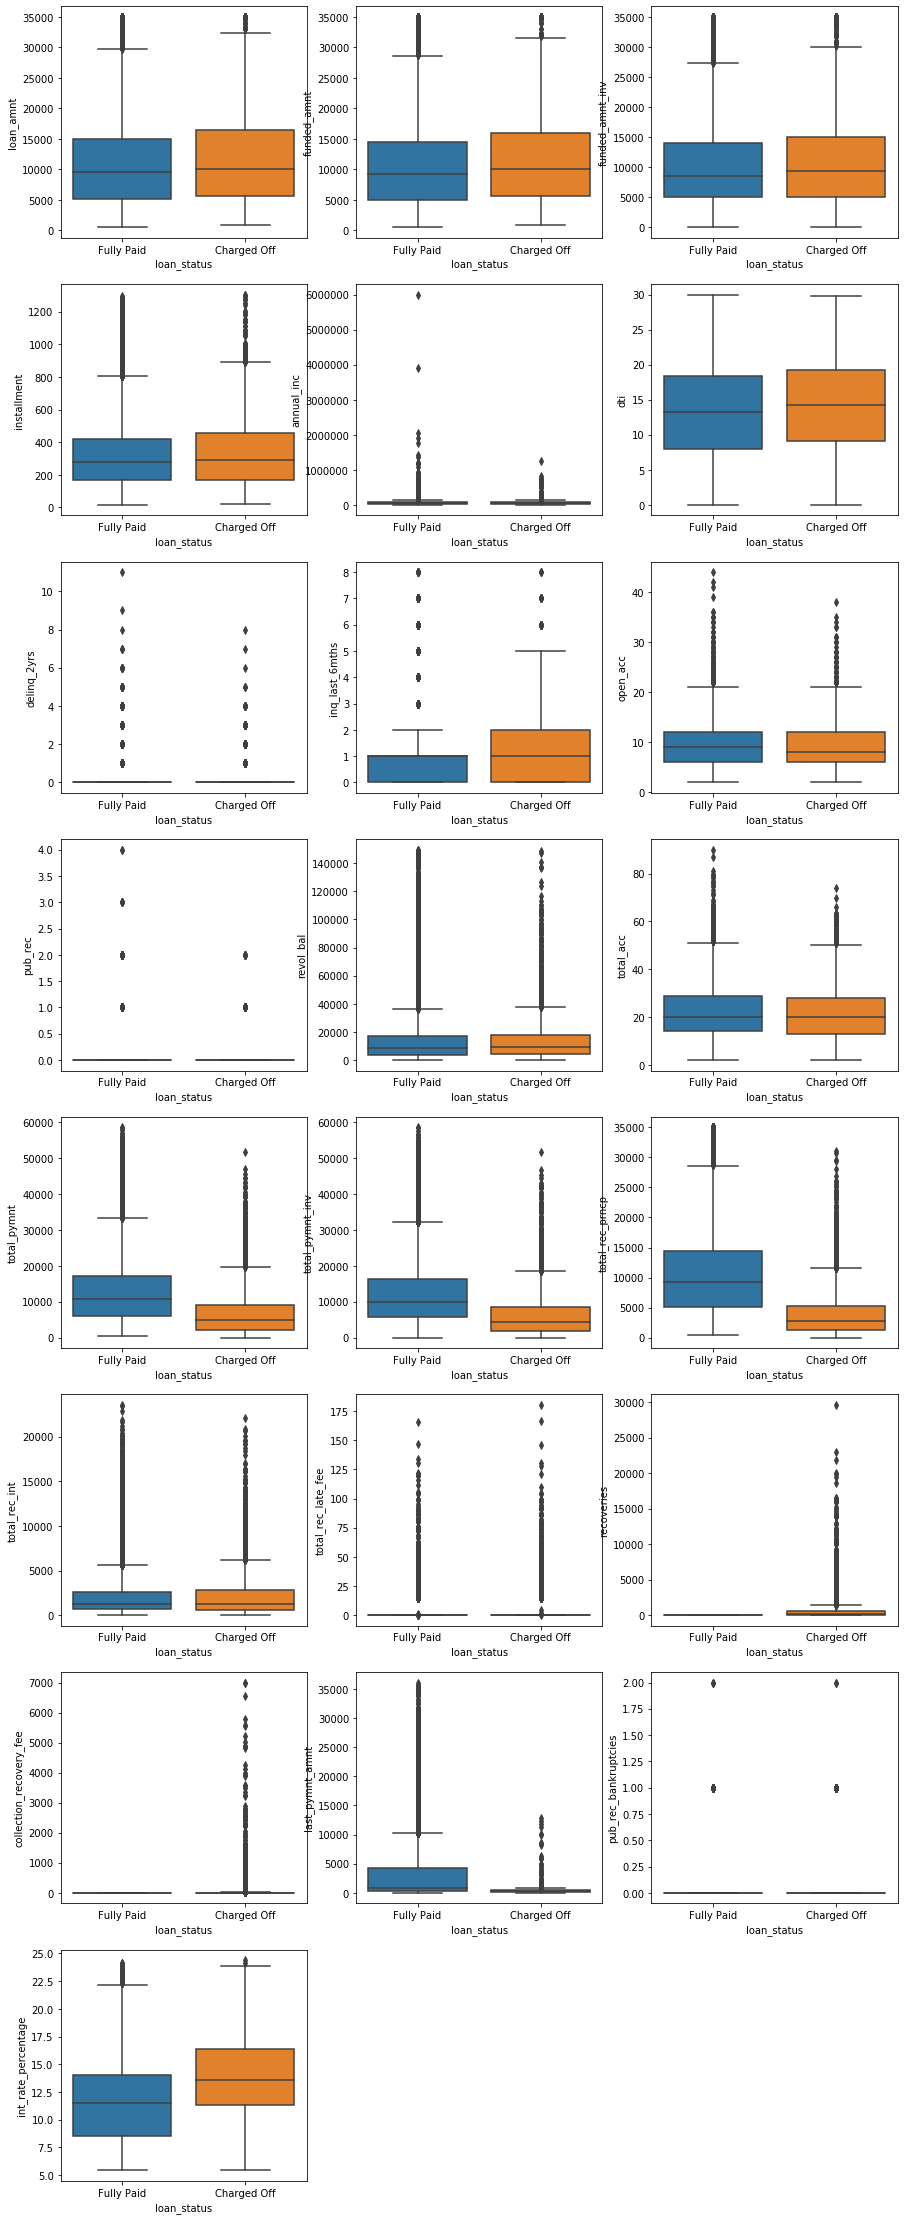

In [55]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=masterData)

plt.show()


Checking the loan defaulter based on the state wise

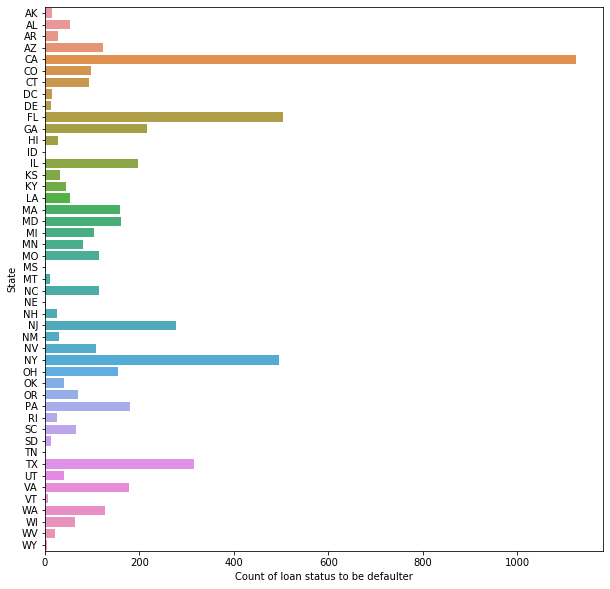

In [56]:
stateWiseDefaulter = masterData[masterData['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=stateWiseDefaulter)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()


##### Loan amount Vs addr_state vs loan Status

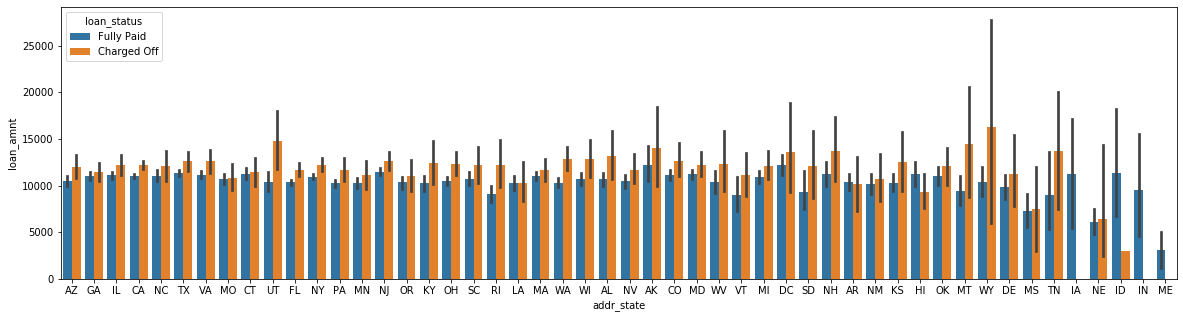

In [57]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=masterData)
plt.show()


**Inference** WY has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

**Inference** : Applicants from the state CA are having high probability to be default


C:\Users\DK\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


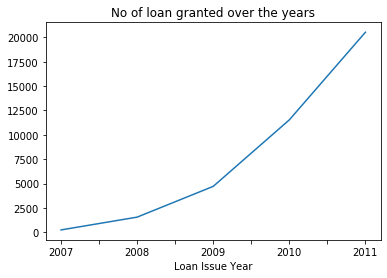

In [58]:
masterData['issue_d_month'], masterData['issue_d_year'] = masterData[
    'issue_d'].str.split('-').str


masterData['issue_d_year'] = '20' + masterData['issue_d_year']

loanStatusOverYear = masterData.groupby('issue_d_year')['loan_status'].count()

loanStatusOverYear.plot.line(x_compat=True)
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()


Avg. loan_amnt over time

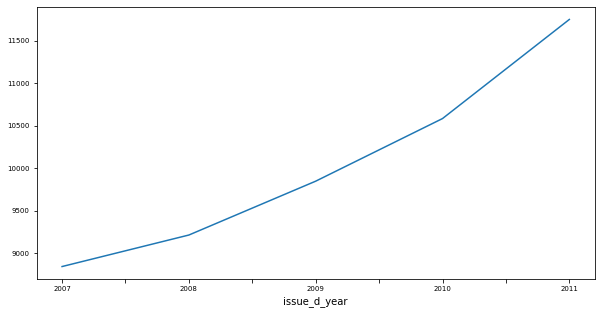

In [59]:
plt.figure(figsize=(10,5))
masterData.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()


Inference: Loan Applicants have been increasing exponentially from year 2007 to 2011

loan_amnt and annual_inc

C:\Users\DK\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


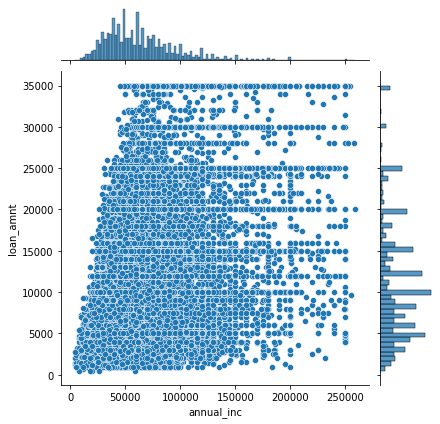

In [60]:
sns.jointplot('annual_inc', 'loan_amnt', masterData.loc[masterData['annual_inc']<260000])
plt.show()

**Inference** : There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

#### annual income with grade

C:\Users\DK\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


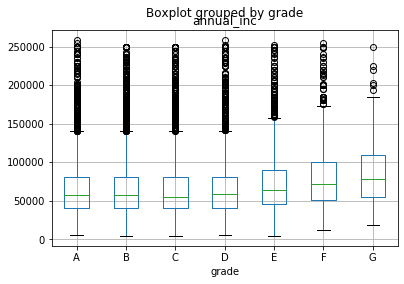

In [61]:
masterData.loc[masterData['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()


#### loan_amnt vs verification_status vs loan status

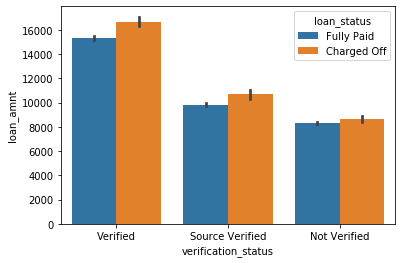

In [62]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=masterData, estimator=np.mean)

**Inference**

Higher loan amounts are Verified more often.

We already know that larger loans are less in number, but see a higher charge off rate.

It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

#### Intrest Rate and Term

C:\Users\DK\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


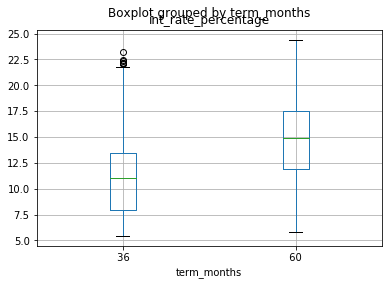

In [63]:
masterData.boxplot(column='int_rate_percentage', by='term_months')
plt.show()

Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.


Interest Rate and Sub Grade

C:\Users\DK\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


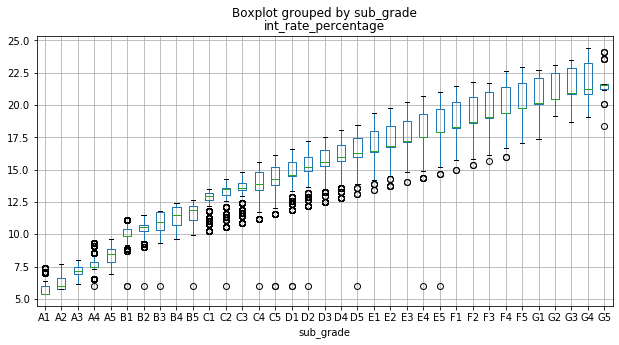

In [64]:
masterData.boxplot(column='int_rate_percentage', by='sub_grade',figsize=(10,5))
plt.show()


**Inference**  Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.


#### Intrest Rate and Loan status

C:\Users\DK\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


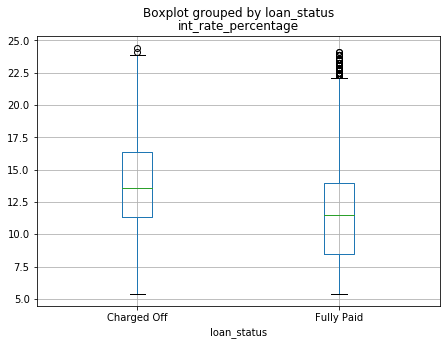

In [65]:
masterData.boxplot(column='int_rate_percentage', by='loan_status',figsize=(7,5))

**Inference** Loans at a higher intrest rate are more likely to be Charged Off.


#### Loan amount vs Grade vs Term

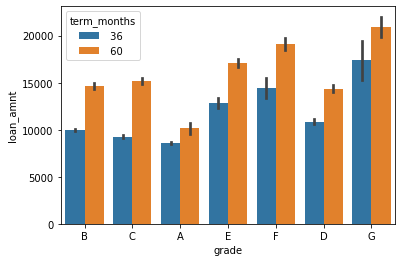

In [66]:
sns.barplot(x='grade', y='loan_amnt', hue="term_months", data=masterData, estimator=np.mean)
plt.show()


**Inference** Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.


#### Loan amount Vs term Vs Loan Status

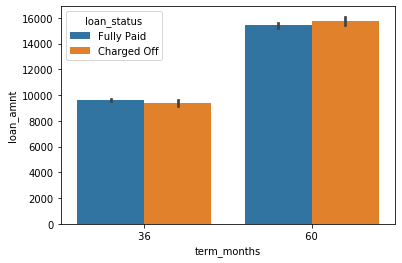

In [67]:
sns.barplot(x='term_months', y='loan_amnt', hue="loan_status", data=masterData, estimator=np.mean)
plt.show()


**Inference** Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.


In [68]:
# Creating a profit and loss column
masterData['PnL']=(
    masterData['total_pymnt']-masterData['funded_amnt']
)*100/masterData['funded_amnt']


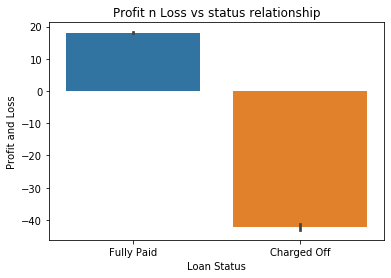

In [69]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='PnL',data=masterData)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()


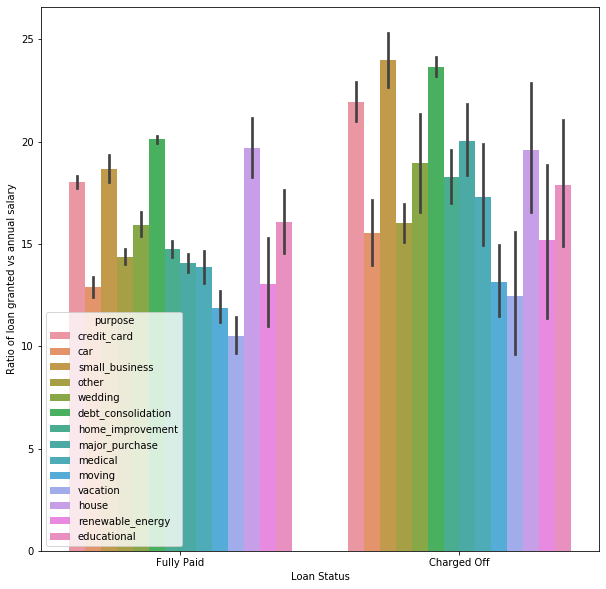

In [70]:
masterData['loan_inc_ratio'
                         ] = masterData.funded_amnt*100/masterData.annual_inc

plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=masterData)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()



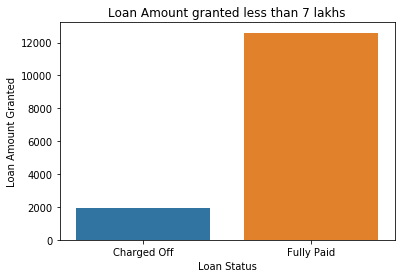

In [71]:
agg = masterData[masterData['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()


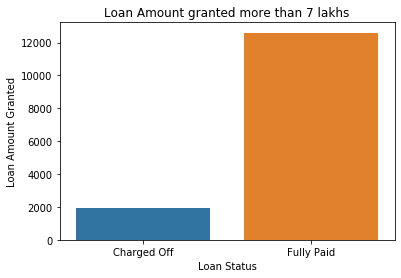

In [72]:
gg = masterData[masterData['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()


####  dti vs open_acc

In [73]:
masterData['dti'].value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
29.57      1
29.01      1
27.80      1
28.83      1
28.04      1
Name: dti, Length: 2853, dtype: int64

In [74]:
masterData['dti_bin'] = pd.cut(masterData['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


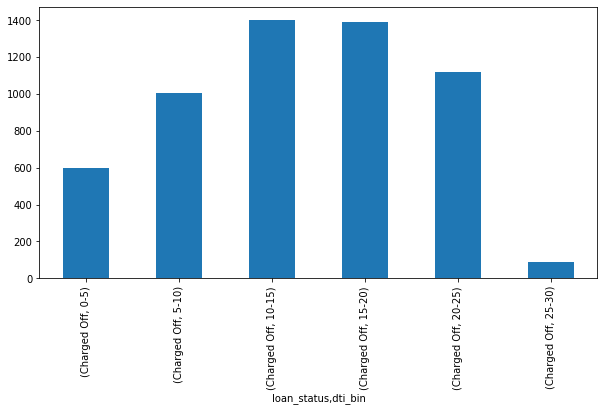

In [88]:
plt.figure(figsize=(10,5))
#masterData['dti_bin'].plot()
#plotLoanStatus(master_loan, 'dti_bin')
chargedData = masterData[masterData['loan_status'] == 'Charged Off']
chargedData.groupby(['loan_status','dti_bin'])['dti_bin'].count().plot.bar()

**Inference** Higher the dti higher the chances of loan being Charged Off